##### Question 1. 
Load the dataset and split it into a training set containing 70% of the samples and a test set containing 30% of the samples. Follow an appropriate strategy for the split. (5%)

In [1]:
#loading the dataset "fake_news_dataset" using pandas
import pandas as pd
df = pd.read_csv("fake_news_dataset.csv")
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [2]:
df.info()

#there is missing data in columns: title, author, text
#no missing data in columns: id, label

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [3]:
df.shape
print("The dataset has", df.shape[0], "rows and", df.shape[1], "columns")

The dataset has 20800 rows and 5 columns


In [4]:
#assess the balance of reliable and unreliable articles available
counts = df["label"].value_counts()
print(counts)
print()

#extract counts for reliable and unreliable articles
print("No.of reliable ('real news') articles: ", counts[0])
print("No. of unreliable ('fake news') articles: ", counts[1])

1    10413
0    10387
Name: label, dtype: int64

No.of reliable ('real news') articles:  10387
No. of unreliable ('fake news') articles:  10413


In [5]:
#no missing data in label column
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

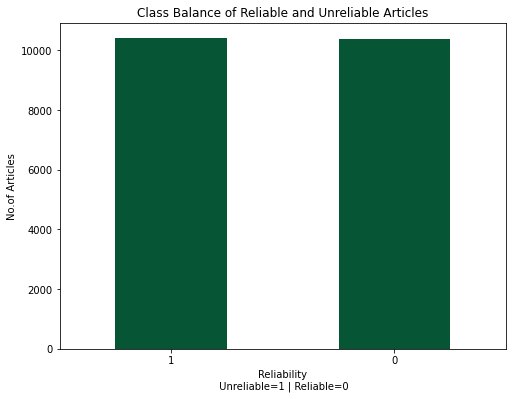

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
df["label"].value_counts().plot(kind="bar", figsize=(8,6), rot=0, color="#065535")
plt.xlabel("Reliability\n Unreliable=1 | Reliable=0")
plt.ylabel("No.of Articles")
plt.title("Class Balance of Reliable and Unreliable Articles")
plt.savefig("ClassBal_Original")

Splitting the Data: Training and Testing Samples

In [7]:
#training set: 70% of the samples
#test set: 30% of the samples
#this is so that the test set can be kept separate only to evaluate performance
from sklearn.model_selection import train_test_split

x = df.drop("label", axis=1)
y = df["label"]

training_data, test_data = train_test_split(df, test_size=0.3, stratify=y, random_state=42)

#check size of each set
print("Size of Training samples: ", len(training_data))
print("Size of Test samples: ", len(test_data))

#check class distribution across both sets
train_count = training_data["label"].value_counts()
test_count = test_data["label"].value_counts()

print("Training Samples: No.of reliable articles: ", train_count[0])
print("Training Samples: No.of unreliable articles: ", train_count[1])
print("Test Samples: No.of reliable articles: ", test_count[0])
print("Test Samples: No.of unreliable articles: ", test_count[1])

Size of Training samples:  14560
Size of Test samples:  6240
Training Samples: No.of reliable articles:  7271
Training Samples: No.of unreliable articles:  7289
Test Samples: No.of reliable articles:  3116
Test Samples: No.of unreliable articles:  3124


In [8]:
#save training and test data as separate csv files
training_data.to_csv("training_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)

In [9]:
#check that datasets have been saved
#load training and test sets
training_data = pd.read_csv("training_data.csv")
test_data = pd.read_csv("test_data.csv")

In [10]:
training_data.head(5)

,id,title,author,text,label
0,6952,DHS Vows to Enforce Donald Trump’s Executive O...,Charlie Spiering,The Department of Homeland Security plans to e...,0
1,13503,Tonopah Test Range Google Earth imagery 7/22/2016,gariac,Tonopah Test Range Google Earth imagery 7/22/2...,1
2,14809,"As Canada Transforms, an Anti-Immigrant Fringe...",Craig S. Smith and Dan Levin,TORONTO — François Deschamps stepped out of...,0
3,17440,NYT’s Friedman: Flynn Resignation Shows Russia...,Pam Key,"Tuesday on MSNBC’s “Morning Joe,” New York Tim...",0
4,3355,John Pilger: Inside The Invisible Government: ...,NaN,John Pilger: Inside The Invisible Government: ...,1


In [11]:
test_data.head(5)

,id,title,author,text,label
0,2008,On This the N.F.L. Agrees: The Cowboys’ Offens...,Victor Mather,Much of the credit for the remarkable rise of ...,0
1,19658,US Drone Strike Kills Afghan Al-Qaeda Commande...,NaN,Get short URL 0 2 0 0 The US military targeted...,1
2,2974,Former DEA Prescription Head Drops a BombShell...,NaN,Former DEA Prescription Head Drops a BombShell...,1
3,15117,The Fix Is In: NBC Affiliate Accidentally Post...,PatriotRising,Posted 11/03/2016 12:44 am by PatriotRising wi...,1
4,20778,This Is a Jobs Report That Democrats Can Boast...,Neil Irwin,There’s not much to say about the July jobs nu...,0


In [12]:
display(test_data.iloc[0])

id                                                     2008
title     On This the N.F.L. Agrees: The Cowboys’ Offens...
author                                        Victor Mather
text      Much of the credit for the remarkable rise of ...
label                                                     0
Name: 0, dtype: object

2. Prepare the data as needed (e.g., pre-processing, cleaning, etc.). (5%)

In [13]:
#concatanate the title and text in each of the training and test samples
#create a new column with the concatanated text
#remove all other columns
training_data["alltext"] = training_data["title"] + ". " + training_data["text"]
training_data = training_data.reindex(columns=["alltext", "label"])
test_data["alltext"] = test_data["title"] + ". " + test_data["text"]
test_data = test_data.reindex(columns=["alltext", "label"])

In [14]:
#convert object type to string for preprocessing
training_data = training_data.astype({"alltext":"string"})
test_data = test_data.astype({"alltext":"string"})

#check data types
print("Data types in Training set :\n", training_data.dtypes)
print()
print("Data types in Test set :\n", test_data.dtypes)

Data types in Training set :
 alltext    string
label       int64
dtype: object

Data types in Test set :
 alltext    string
label       int64
dtype: object


In [15]:
#check for missing data
print("Missing data in Training Set: \n", training_data.isna().sum())
print()
print("Missing data in Test Set: \n", test_data.isna().sum())

Missing data in Training Set: 
 alltext    417
label        0
dtype: int64

Missing data in Test Set: 
 alltext    180
label        0
dtype: int64


In [16]:
#check for missing values in both sets and remove empty values
#choose to remove missing data rows at this stage as concatanation would've removed some of the NAs.
training_data = training_data.dropna()
test_data = test_data.dropna()

trainNA = training_data.shape #2515 rows dropped
testNA = test_data.shape
print(trainNA)
print(testNA)
print()

(14143, 2)
(6060, 2)



In [17]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import re

In [18]:
#IN ORDER TO TOKENISE

#create a list of articles + labels for both training and test samples
training_text = training_data["alltext"].tolist()
training_label = training_data["label"].tolist()

test_text = test_data["alltext"].tolist()
test_label = test_data["label"].tolist()

#confirm the same no.of articles and labels in both samples
print("No.of articles in Training set: ", len(training_text))
print("No.of labels in Training set: ", len(training_label))
print("No.of articles in Test set: ", len(test_text))
print("No.of labels in Training set: ", len(test_label))

No.of articles in Training set:  14143
No.of labels in Training set:  14143
No.of articles in Test set:  6060
No.of labels in Training set:  6060


In [19]:
#tokenize each article to its lowercase words

training_tokens = []
training_label_final = []
test_tokens = []
test_label_final = []

for i in range(len(training_text)):
    try: 
        tokens = word_tokenize(training_text[i].lower()) #tokenise+lowercase
        training_tokens.append(tokens)
        training_label_final.append(training_label[i])
    except:
        pass

for x in range(len(test_text)):
    try: 
        tokens = word_tokenize(test_text[x].lower()) #tokenise+lowercase
        test_tokens.append(tokens)
        test_label_final.append(test_label[x])
    except:
        pass

#confirm the same no.of articles and labels in both samples
print("Total no. of training samples: ", len(training_tokens))
print("Total no. of training labels: ", len(training_label_final))
print("Total no. of test samples: ", len(test_tokens))
print("Total no. of test labels: ", len(test_label_final))

Total no. of training samples:  14143
Total no. of training labels:  14143
Total no. of test samples:  6060
Total no. of test labels:  6060


In [20]:
print("Training sample 1: ", training_tokens[0])

Training sample 1:  ['dhs', 'vows', 'to', 'enforce', 'donald', 'trump', '’', 's', 'executive', 'order', '-', 'breitbart', '.', 'the', 'department', 'of', 'homeland', 'security', 'plans', 'to', 'enforce', 'president', 'donald', 'trump', '’', 's', 'executive', 'order', 'to', 'dramatically', 'reduce', 'immigration', 'from', 'high', 'threat', 'countries', 'in', 'the', 'middle', 'east', '.', '[', '“', 'the', 'department', 'of', 'homeland', 'security', 'will', 'continue', 'to', 'enforce', 'all', 'of', 'president', 'trump', '’', 's', 'executive', 'orders', 'in', 'a', 'manner', 'that', 'ensures', 'the', 'safety', 'and', 'security', 'of', 'the', 'american', 'people', ',', '”', 'the', 'agency', 'made', 'in', 'a', 'statement', 'sent', 'to', 'reporters', 'on', 'sunday', '.', 'they', 'reminded', 'americans', 'that', 'only', 'a', 'small', 'percentage', 'of', 'travelers', 'were', 'affected', 'by', 'the', 'new', 'restrictions', '.', 'the', 'agency', 'noted', 'that', 'although', 'some', 'individuals', 

In [21]:
print("Test sample 1: ", test_tokens[0])

Test sample 1:  ['on', 'this', 'the', 'n.f.l', '.', 'agrees', ':', 'the', 'cowboys', '’', 'offensive', 'line', 'is', 'no', '.', '1', '-', 'the', 'new', 'york', 'times', '.', 'much', 'of', 'the', 'credit', 'for', 'the', 'remarkable', 'rise', 'of', 'the', 'dallas', 'cowboys', 'from', 'last', 'season', 'to', 'this', 'season', 'has', 'gone', 'to', 'two', 'rookies', ':', 'quarterback', 'dak', 'prescott', 'and', 'running', 'back', 'ezekiel', 'elliott', '.', 'but', 'insiders', 'will', 'tell', 'you', 'that', 'the', 'real', 'secret', 'to', 'the', 'cowboys', '’', 'success', 'is', 'their', 'offensive', 'line', ',', 'which', ',', 'by', 'most', 'accounts', ',', 'is', 'the', 'best', 'in', 'the', 'n.', 'f.', 'l.', 'whether', 'blocking', 'for', 'elliott', 'or', 'giving', 'prescott', 'the', 'time', 'he', 'needs', 'to', 'find', 'an', 'open', 'receiver', ',', 'dallas', '’', 's', 'dominant', 'line', 'is', 'the', 'constant', 'that', 'has', 'driven', 'the', 'team', 'forward', '.', 'it', 'is', 'difficult', '

In [22]:
pTraining_articles = training_tokens
pTraining_label = training_label_final
pTest_articles = test_tokens
pTest_label = test_label_final

stopwords_english = stopwords.words('english') # Load the stop words list for English in variable

for i in range(len(pTraining_articles)):
    new_tokens = []
    for word in pTraining_articles[i]:
        word = word.replace("-", "") #remove hyphens
        word = word.replace(".", "") #remove dots to normalise abbreiviations
        #select only tokens with letters a to z
        regex_check = re.match("[a-z]+", word)
        if (regex_check!=None):
            if((regex_check.group()==word) and (word not in stopwords_english)): # Check regex and stopwords
                new_tokens.append(word)
    pTraining_articles[i] = new_tokens

#check if pre-processing led to any empty article texts
#for i in range(len(pTraining_articles)):
#    if len(pTraining_articles[i])==0:
#        print("Article", i, " in Training sample is empty")
#        pTraining_articles.pop(i)
#        pTraining_label.pop(i)
#    else:
#        i += 1
        
for x in range(len(pTest_articles)):
    new_tokens = []
    for word in pTest_articles[x]:
        word = word.replace("-", "") #remove hyphens
        word = word.replace(".", "") #remove dots to normalise abbreiviations
        #select only tokens with letters a to z
        regex_check = re.match("[a-z]+", word)
        if (regex_check!=None):
            if((regex_check.group()==word) and (word not in stopwords_english)): # Check regex and stopwords
                new_tokens.append(word)
    pTest_articles[x] = new_tokens
    
#check if pre-processing led to any empty article texts     
#for i in range(len(pTest_articles)):
#    if len(pTest_articles[i])==0:
#        print("Article", i, "Test sample is empty")
#        pTest_articles.pop(i)
#        pTest_label.pop(i)
#    else:
#        i += 1
        
print("Total no. of training samples: ", len(pTraining_articles))
print("Total no. of training labels: ", len(pTraining_label))
print("Total no. of test samples: ", len(pTest_articles))
print("Total no. of test labels: ", len(pTest_label))

#https://www.freecodecamp.org/news/list-index-out-of-range-python-error-solved/
#citation for else: i +=1

Total no. of training samples:  14143
Total no. of training labels:  14143
Total no. of test samples:  6060
Total no. of test labels:  6060


In [23]:
print("Training sample 1 [lowercase,no symbols,no numbers,no punctuation]: \n ", pTraining_articles[0])

Training sample 1 [lowercase,no symbols,no numbers,no punctuation]: 
  ['dhs', 'vows', 'enforce', 'donald', 'trump', 'executive', 'order', 'breitbart', 'department', 'homeland', 'security', 'plans', 'enforce', 'president', 'donald', 'trump', 'executive', 'order', 'dramatically', 'reduce', 'immigration', 'high', 'threat', 'countries', 'middle', 'east', 'department', 'homeland', 'security', 'continue', 'enforce', 'president', 'trump', 'executive', 'orders', 'manner', 'ensures', 'safety', 'security', 'american', 'people', 'agency', 'made', 'statement', 'sent', 'reporters', 'sunday', 'reminded', 'americans', 'small', 'percentage', 'travelers', 'affected', 'new', 'restrictions', 'agency', 'noted', 'although', 'individuals', 'held', 'screening', 'allowed', 'entry', 'united', 'states', 'despite', 'protesters', 'area', 'airports', 'describing', 'order', 'muslim', 'ban', 'individuals', 'went', 'enhanced', 'security', 'screenings', 'processed', 'entry', 'united', 'states', 'consistent', 'immigra

In [24]:
print("Test sample 1 [lowercase,no symbols,no numbers,no punctuation]: \n ", pTest_articles[0])

Test sample 1 [lowercase,no symbols,no numbers,no punctuation]: 
  ['nfl', 'agrees', 'cowboys', 'offensive', 'line', 'new', 'york', 'times', 'much', 'credit', 'remarkable', 'rise', 'dallas', 'cowboys', 'last', 'season', 'season', 'gone', 'two', 'rookies', 'quarterback', 'dak', 'prescott', 'running', 'back', 'ezekiel', 'elliott', 'insiders', 'tell', 'real', 'secret', 'cowboys', 'success', 'offensive', 'line', 'accounts', 'best', 'n', 'f', 'l', 'whether', 'blocking', 'elliott', 'giving', 'prescott', 'time', 'needs', 'find', 'open', 'receiver', 'dallas', 'dominant', 'line', 'constant', 'driven', 'team', 'forward', 'difficult', 'scientifically', 'assess', 'merits', 'offensive', 'line', 'linemen', 'compile', 'straightforward', 'statistics', 'like', 'yardage', 'touchdowns', 'measures', 'exist', 'point', 'cowboys', 'line', 'elite', 'three', 'five', 'starters', 'chosen', 'pro', 'bowl', 'total', 'matched', 'oakland', 'raiders', 'fourth', 'consecutive', 'pro', 'bowl', 'selection', 'left', 'tackl

In [25]:
pp_training_text = pTraining_articles
pp_test_text = pTest_articles

training_label_final = pTraining_label
test_label_final = pTest_label

#save training and test data as dataframes

#create two dataframes
clean_training_data = pd.DataFrame(columns=["alltext","label"])
clean_test_data = pd.DataFrame(columns=["alltext", "label"])

#loop text and labels into each dataframe
for i in range(len(training_label_final)):
    clean_training_data.loc[i,"alltext"] = pp_training_text[i]
    clean_training_data.loc[i,"label"] = training_label_final[i]
    
for i in range(len(test_label_final)):
    clean_test_data.loc[i, "alltext"] = pp_test_text[i]
    clean_test_data.loc[i,"label"] = test_label_final[i]

#convert list of strings using .join
clean_training_data["alltext"] = clean_training_data["alltext"].apply(" ".join)
clean_test_data["alltext"] = clean_test_data["alltext"].apply(" ".join)

print("Snippet of cleaned training data: \n", clean_training_data.head())
print()
print("Snippet of cleaned test data: \n", clean_test_data.head())

Snippet of cleaned training data: 
                                              alltext label
0  dhs vows enforce donald trump executive order ...     0
1  tonopah test range google earth imagery tonopa...     1
2  canada transforms antiimmigrant fringe stirs n...     0
3  nyt friedman flynn resignation shows russia ha...     0
4  john pilger inside invisible government war pr...     1

Snippet of cleaned test data: 
                                              alltext label
0  nfl agrees cowboys offensive line new york tim...     0
1  us drone strike kills afghan alqaeda commander...     1
2  former dea prescription head drops bombshell c...     1
3  fix nbc affiliate accidentally posts election ...     1
4  jobs report democrats boast new york times muc...     0


In [26]:
#remove texts that are less than 50 characters long to remove noise (as it would not add much to the learning process)
#should remove texts that are empty as well.
clean_training_data.drop(clean_training_data[clean_training_data.alltext.str.len() < 50].index, inplace=True)
clean_test_data.drop(clean_test_data[clean_test_data.alltext.str.len() < 50].index, inplace=True)


#reduce the no.of words to be considered for each text to 200 (for faster performance)
def truncate_text_to_max_words(text,max_words): # Keep only the first max_words of each text
    text = text.split(maxsplit=max_words)
    text = ' '.join(text[:max_words])
    return text

max_words = 200 # Set the maximum number of words to be considered for each document 

# Truncate text to first 200 words
clean_training_data['alltext'] = clean_training_data['alltext'].apply(truncate_text_to_max_words,args=(max_words,))
clean_test_data['alltext'] = clean_test_data['alltext'].apply(truncate_text_to_max_words,args=(max_words,))

print("Samples in Training Set: ", len(clean_training_data["alltext"]))
print("Labels in Training Set: ", len(clean_training_data["label"]))
print("Samples in Test Set: ", len(clean_test_data["alltext"]))
print("Labels in Test Set: ", len(clean_test_data["label"]))

Samples in Training Set:  14011
Labels in Training Set:  14011
Samples in Test Set:  5997
Labels in Test Set:  5997


In [27]:
#save the training and test dataframes as csv
clean_training_data.to_csv("clean_training_data.csv", index=False)
clean_test_data.to_csv("clean_test_data.csv", index=False)

3. Transform the input text using a suitable representation for each model. (8%)

In [28]:
#loading cleaned training and test sets

final_training = pd.read_csv("clean_training_data.csv")
final_test = pd.read_csv("clean_test_data.csv")

print(final_training.head(5))

                                             alltext  label
0  dhs vows enforce donald trump executive order ...      0
1  tonopah test range google earth imagery tonopa...      1
2  canada transforms antiimmigrant fringe stirs n...      0
3  nyt friedman flynn resignation shows russia ha...      0
4  john pilger inside invisible government war pr...      1


In [29]:
#convert training and test texts to list
training_text_final = final_training["alltext"].tolist()
training_label_final = final_training["label"].tolist()

test_text_final = final_test["alltext"].tolist()
test_label_final = final_test["label"].tolist()

print("Samples in Training Set: ", len(training_text_final))
print("Labels in Training Set: ", len(training_label_final))
print("Samples in Test Set: ", len(test_text_final))
print("Labels in Test Set: ", len(test_label_final))

Samples in Training Set:  14011
Labels in Training Set:  14011
Samples in Test Set:  5997
Labels in Test Set:  5997


In [30]:
#converting text to bag of words for naive bayes and KNN
#text already in bag of words as tolist()

bow_training = training_text_final
bow_test = test_text_final

In [31]:
print(bow_training[0])

dhs vows enforce donald trump executive order breitbart department homeland security plans enforce president donald trump executive order dramatically reduce immigration high threat countries middle east department homeland security continue enforce president trump executive orders manner ensures safety security american people agency made statement sent reporters sunday reminded americans small percentage travelers affected new restrictions agency noted although individuals held screening allowed entry united states despite protesters area airports describing order muslim ban individuals went enhanced security screenings processed entry united states consistent immigration laws judicial orders department said agency signal prepared back rigorous enforcement trump executive action department homeland security comply judicial orders faithfully enforce immigration laws implement president trump executive orders ensure entering united states pose threat country american people statement c

In [32]:
print(bow_test[0])

nfl agrees cowboys offensive line new york times much credit remarkable rise dallas cowboys last season season gone two rookies quarterback dak prescott running back ezekiel elliott insiders tell real secret cowboys success offensive line accounts best n f l whether blocking elliott giving prescott time needs find open receiver dallas dominant line constant driven team forward difficult scientifically assess merits offensive line linemen compile straightforward statistics like yardage touchdowns measures exist point cowboys line elite three five starters chosen pro bowl total matched oakland raiders fourth consecutive pro bowl selection left tackle tyron smith third straight center travis frederick right guard zack martin line rounded left guard ronald leary subbing injured la el collins veteran right tackle doug free always felt offensive line heartbeat franchise troy aikman former cowboys quarterback said got tough physical offensive linemen team going tough physical becomes identity

In [41]:
#transforming training data for use in convolutional neural network
#word embeddings

df1 = pd.read_csv('testvectors.csv', header=None) # Read csv file. Indicate that there is no row with column titles
count_row = df1.shape[0]  # Gives number of rows
count_col = df1.shape[1]  # Gives number of columns

print("\nTotal words:",count_row)
print("Dimensions:",count_col-1) # Subtract 1 for the word column


Total words: 155
Dimensions: 300


In [42]:
vector = df1.iloc[0,1:301] # Access columns 1 to 301 of the 0-th row of the dataframe

#convert df to numpy array
import numpy as np
word_embedding = vector.to_numpy(dtype=float)

In [43]:
#load word embeddings
word_embeddings = dict()
for i in range(count_row): # Iterate through all rows in dataframe (words)
    word = df1.iloc[i,0] # Get word
    embedding = df1.iloc[i,1:count_col].to_numpy(dtype=float) # Get embedding and convert to float numpy array
    word_embeddings[word] = embedding

In [44]:
from scipy.spatial import distance
from nltk import word_tokenize

#function to compute document embedding
def get_document_embedding(word_list,word_embeddings,k):
    document_embedding = np.zeros(k,dtype=float) # Create embedding of k zero-valued elements
    valid_words = 0
    for word in word_list:
        try:
            document_embedding = document_embedding + word_embeddings[word][0:k] # Add word embedding to partial sum
            valid_words += 1
        except:
            pass # If word embedding is not available, then ignore the word
    document_embedding = document_embedding / valid_words # Divide all elements by number of valid words to get the mean
    return document_embedding

In [45]:
#load training dataset

dfCNN = pd.read_csv("clean_training_data.csv")

#create a list of articles
text = dfCNN["alltext"].tolist()

#create a list of labels
label = dfCNN["label"].tolist()

#confirm the same no.of articles and labels
print("No.of articles: ", len(text))
print("No.of labels: ", len(label))

No.of articles:  14011
No.of labels:  14011


In [46]:
from nltk import word_tokenize
from string import punctuation

punctuation_list = list(punctuation)

text_embeddings = []
for i in range(len(text)): # Iterate through all texts
    tokens = word_tokenize(text[i].lower()) # Tokenise "text" into words
    words_list = []
    for word in tokens:
        if(word not in punctuation_list):
            words_list.append(word)
    text_embeddings.append(get_document_embedding(words_list,word_embeddings,300))

for i in range(len(text)): # Iterate through all texts  
    print(i,text_embeddings[i][0:5],"->",label[i]) # Print the first 5 elements of each document embedding

<ipython-input-44-259b7662ef7c>:14: RuntimeWarning: invalid value encountered in true_divide
  document_embedding = document_embedding / valid_words # Divide all elements by number of valid words to get the mean


0 [-0.030809  -0.005947   0.07941   -0.045333  -0.0567265] -> 0
1 [ 0.047394   -0.01833083  0.09783342 -0.01535017 -0.001924  ] -> 1
2 [ 0.00954967  0.02539417  0.04335    -0.0273855   0.00235667] -> 0
3 [ 0.02708163 -0.01666313  0.0972305  -0.03407675 -0.01950312] -> 0
4 [ 0.01652778  0.00528978  0.04707922 -0.05308778 -0.01740922] -> 1
5 [-0.00404653  0.01530153  0.06620176  0.00413818  0.03624624] -> 1
6 [ 0.00828355  0.010366    0.02044736 -0.03429755 -0.01087227] -> 0
7 [ 0.0373915  -0.02631383  0.077753   -0.04265975 -0.010683  ] -> 0
8 [ 0.05903656  0.00369711  0.04212222 -0.03914167  0.01985344] -> 0
9 [ 0.0329    -0.0050516  0.0689525 -0.010335   0.0040568] -> 1
10 [ 0.03657378 -0.03034922  0.05439778 -0.033512    0.01602333] -> 0
11 [ 0.077972    0.01479367  0.03166567 -0.06730733  0.00529   ] -> 0
12 [ 0.0194215   0.010787    0.00278308 -0.03185792 -0.00410192] -> 0
13 [ 0.024941    0.02603042  0.01322242 -0.02635425  0.00497733] -> 0
14 [ 0.04554082 -0.00631674  0.04860233 

In [47]:
#split the dataset to training and test (validation) data
from sklearn.model_selection import train_test_split

samples_train, samples_test, labels_train, labels_test = train_test_split(text_embeddings, label, test_size=0.3, random_state=42)

no_of_training_samples = len(samples_train)
no_of_test_samples = len(samples_test)
total_samples = no_of_training_samples+no_of_test_samples
print("Total samples:\t\t%4d" % total_samples)
print("Training samples:\t%4d (%2.2f%s)" %
(no_of_training_samples,(no_of_training_samples/total_samples)*100,"%"))
print("Test samples:\t\t%4d (%2.2f%s)" %
(no_of_test_samples,(no_of_test_samples/total_samples)*100,"%"))
print()
print("total samples_train: ", len(samples_train))
print("total labels_train: ", len(labels_train))
print("total samples_test: ", len(samples_test))
print("total labels_test: ", len(labels_test))

Total samples:		14011
Training samples:	9807 (70.00%)
Test samples:		4204 (30.00%)

total samples_train:  9807
total labels_train:  9807
total samples_test:  4204
total labels_test:  4204


In [97]:
#Transforming training data for use in RNN/LSTM

import pandas as pd
dfLSTM = pd.read_csv("clean_training_data.csv")
dfLSTM.head(10)

,alltext,label
0,dhs vows enforce donald trump executive order ...,0
1,tonopah test range google earth imagery tonopa...,1
2,canada transforms antiimmigrant fringe stirs n...,0
3,nyt friedman flynn resignation shows russia ha...,0
4,john pilger inside invisible government war pr...,1
5,path total dictatorship america shadow governm...,1
6,pursuing dream film tips spike lee new york ti...,0
7,judge approves consent decree overhaul baltimo...,0
8,fake news nyt wapo executive order draft gets ...,0
9,making sense russian naval task force coast sy...,1


In [98]:
#create Pytorch dataset
import torch
from torchtext.legacy import data #For handling text data
from nltk import word_tokenize # Import the word_tokenize function from NLTK

In [99]:
TEXT = data.Field(tokenize=word_tokenize,batch_first=True,include_lengths=True) # Create text field for dataset
LABEL = data.LabelField(dtype = torch.float,batch_first=True) # Create label field for dataset

fields = [('text',TEXT),('label', LABEL)]

# Load dataset from csv file
dataset=data.TabularDataset(path = 'clean_training_data.csv',format = 'csv',fields = fields,skip_header = True)

print(vars(dataset.examples[0])) # Print first text as an example

{'text': ['dhs', 'vows', 'enforce', 'donald', 'trump', 'executive', 'order', 'breitbart', 'department', 'homeland', 'security', 'plans', 'enforce', 'president', 'donald', 'trump', 'executive', 'order', 'dramatically', 'reduce', 'immigration', 'high', 'threat', 'countries', 'middle', 'east', 'department', 'homeland', 'security', 'continue', 'enforce', 'president', 'trump', 'executive', 'orders', 'manner', 'ensures', 'safety', 'security', 'american', 'people', 'agency', 'made', 'statement', 'sent', 'reporters', 'sunday', 'reminded', 'americans', 'small', 'percentage', 'travelers', 'affected', 'new', 'restrictions', 'agency', 'noted', 'although', 'individuals', 'held', 'screening', 'allowed', 'entry', 'united', 'states', 'despite', 'protesters', 'area', 'airports', 'describing', 'order', 'muslim', 'ban', 'individuals', 'went', 'enhanced', 'security', 'screenings', 'processed', 'entry', 'united', 'states', 'consistent', 'immigration', 'laws', 'judicial', 'orders', 'department', 'said', 'ag

In [100]:
#dividing data into training and test sets

import random
RANDOM_SEED = 42 # Set random seed for reproducibility. Remove for real applications

# Divide dataset into a training set (70%) and a test set (30%)
training_data, test_data = dataset.split(split_ratio=0.7, random_state = random.seed(RANDOM_SEED))

print("Training samples:",len(training_data))
print("Test samples:",len(test_data))

Training samples: 9808
Test samples: 4203


In [101]:
#creating vocabulary using training set

TEXT.build_vocab(training_data,min_freq=1) # Build vocabulary from training set. Consider words that occur at least 1 time
LABEL.build_vocab(training_data) # Build vocabulary for labels

print("Size of TEXT vocabulary:",len(TEXT.vocab)) # Number of unique tokens in vocabulary
print("Size of LABEL vocabulary:",len(LABEL.vocab),"\n") # Number of unique labels
print("Most common tokens:",TEXT.vocab.freqs.most_common(10),"\n") # Print the 10 most common tokens in the training set

# Print the index number for the unknown token (<unk>) and the token used for padding (<pad>)
print("Index of unknown word <unk>:",TEXT.vocab.stoi['<unk>'])
print("Index of padding word <pad>:",TEXT.vocab.stoi['<pad>'])

Size of TEXT vocabulary: 69856
Size of LABEL vocabulary: 2 

Most common tokens: [('trump', 14489), ('said', 12491), ('new', 9514), ('mr', 8416), ('one', 6850), ('clinton', 6663), ('people', 6552), ('president', 6285), ('would', 6097), ('us', 5142)] 

Index of unknown word <unk>: 0
Index of padding word <pad>: 1


Implement a Naïve Bayes model for predicting the reliability of news articles. Train your model on the training set and test it on the test set. (5%)

In [102]:
#NAIVE BAYES
#text classification using a Multinomial Naive Bayes

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Build the Naive Bayes model by setting a pipeline where the input is first converted
# to TF-IDF vectors and then a Multinomial Naive Bayes is used
model1_nb = make_pipeline(TfidfVectorizer(), MultinomialNB())
model1_nb.fit(bow_training, training_label_final) # Train the model on the training data

predicted_categories1_nb = model1_nb.predict(bow_test) # Predict the categories of the test data
print("Predicted:",predicted_categories1_nb.tolist()[0:10]) # Print the first 10 predictions
print("Ground truth:",test_label_final[0:10]) # Print the first 10 ground truth values

Predicted: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
Ground truth: [0, 1, 1, 1, 0, 0, 1, 0, 0, 1]


Implement two k-Nearest Neighbours models (k=3, k=7) for predicting the reliability of news articles. Train your models on the training set and test them on the test set. (8%)

In [103]:
from sklearn.neighbors import KNeighborsClassifier
# Build the kNN model by setting a pipeline where the input is first converted
# to TF-IDF vectors and then a kNN classifier for k=3 is used
model2_knn3 = make_pipeline(TfidfVectorizer(), KNeighborsClassifier(n_neighbors=3))
model2_knn3.fit(bow_training, training_label_final) # Train the model on the training data
predicted_categories2_knn3 = model2_knn3.predict(bow_test) # Predict the categories of the test data
print("Predicted:",predicted_categories2_knn3.tolist()[0:10]) # Print the first 10 predictions
print("Ground truth:",test_label_final[0:10]) # Print the first 10 ground truth values

Predicted: [0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
Ground truth: [0, 1, 1, 1, 0, 0, 1, 0, 0, 1]


In [104]:
from sklearn.neighbors import KNeighborsClassifier
# Build the kNN model by setting a pipeline where the input is first converted
# to TF-IDF vectors and then a kNN classifier for k=3 is used
model3_knn7 = make_pipeline(TfidfVectorizer(), KNeighborsClassifier(n_neighbors=7))
model3_knn7.fit(bow_training, training_label_final) # Train the model on the training data
predicted_categories3_knn7 = model3_knn7.predict(bow_test) # Predict the categories of the test data
print("Predicted:",predicted_categories3_knn7.tolist()[0:10]) # Print the first 10 predictions
print("Ground truth:",test_label_final[0:10]) # Print the first 10 ground truth values

Predicted: [0, 1, 1, 1, 0, 0, 1, 0, 0, 1]
Ground truth: [0, 1, 1, 1, 0, 0, 1, 0, 0, 1]


Implement a Recurrent Neural Network (RNN) or a Long Short-Term Memory (LSTM) model for predicting the reliability of news articles. Train your model on the training set and test it on the test set. (10%)

In [105]:
#defining model architecture 
#create two iterators for training and test data

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #Set device to GPU if cuda available, else CPU
print("Device:",device)

torch.manual_seed(RANDOM_SEED)

BATCH_SIZE = 32 #Set batch size for training

# Create data iterator for training and test sets
training_iterator, test_iterator = data.BucketIterator.splits(
    (training_data, test_data),
    batch_size = BATCH_SIZE,
    sort_key = lambda x: len(x.text),
    sort_within_batch=True,
    device = device)

Device: cpu


In [106]:
import torch.nn as nn

class FakeNewsNet(nn.Module):
    
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, 
                 bidirectional, dropout):
        
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim) # Word embedding layer
        self.lstm = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers=n_layers,
                            bidirectional=bidirectional,
                            dropout=dropout,
                            batch_first=True) # LSTM layer
        self.fc1 = nn.Linear(hidden_dim * 2, output_dim) # Dense layer
        self.act = nn.Sigmoid()

    def forward(self, text, text_lengths):
        embedded = self.embedding(text) # Create embedding of the input text
        # Handle padding to ignore padding during training of the RNN
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths,batch_first=True)
        packed_output, (hidden, cell) = self.lstm(packed_embedded)
        
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1) # Concatenate the final forward
        
        dense_outputs=self.fc1(hidden)
        outputs=self.act(dense_outputs) # Apply sigmoid activation function to output
        
        return outputs

In [107]:
# Set hyperparameters for network architecture and training
vocabulary_size = len(TEXT.vocab)
embedding_dimensions = 10 # Set to 10 for faster computations. Larger numbers typically required
LSTM_no_of_hidden_nodes = 16 # The number of features in the hidden state h of the LSTM
LSTM_no_of_recurrent_layers = 2 # Number of recurrent layers for RNN (to be stacked)
LSTM_bidirection = True # Set to True for bidirectional LSTM (BiLSTM)
LSTM_dropout = 0.2 # If not 0, introduces a dropout layer in the output of the LSTM
output_size = 1 # Size of output layer

# Initialise the model
model4_lstm = FakeNewsNet(vocabulary_size, embedding_dimensions, LSTM_no_of_hidden_nodes,
                    output_size, LSTM_no_of_recurrent_layers,
                    bidirectional = LSTM_bidirection,dropout = LSTM_dropout)

print("Model architecture:\n",model4_lstm) # Print model's architecture

def count_parameters(model4_lstm): # Computes the number of trainable parameters in the model
    return sum(p.numel() for p in model4_lstm.parameters() if p.requires_grad)

print("\nThe model has",count_parameters(model4_lstm),"trainable parameters")

Model architecture:
 FakeNewsNet(
  (embedding): Embedding(69856, 10)
  (lstm): LSTM(10, 16, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (fc1): Linear(in_features=32, out_features=1, bias=True)
  (act): Sigmoid()
)

The model has 708577 trainable parameters


In [108]:
import torch.optim as optim

optimizer = optim.Adam(model4_lstm.parameters()) # Use the Adam optimiser
criterion = nn.BCELoss() # Use Binary Cross Entropy between the target and the output as the loss function

# Define binary accuracy metric
def binary_accuracy(preds, y):
    rounded_preds = torch.round(preds) # Round predictions to the closest integer
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

# Sent model to device
model4_lstm = model4_lstm.to(device)
criterion = criterion.to(device)

In [109]:
def train(model4_lstm, iterator, optimizer, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model4_lstm.train() # Set the model in training phase
    for batch in iterator:
        optimizer.zero_grad() # Reset the gradients after every batch
        text, text_lengths = batch.text # Retrieve text and number of words
        predictions = model4_lstm(text, text_lengths).squeeze() # Convert to 1D tensor
        loss = criterion(predictions, batch.label) # Compute the loss
        acc = binary_accuracy(predictions, batch.label) # Compute the binary accuracy
        loss.backward() # Backpropagation
        optimizer.step() # Update the weights
        # Update epoch's loss and accuracy
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [110]:
def evaluate(model4_lstm, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model4_lstm.eval() # Set the model in evaluation phase
    with torch.no_grad(): #Deactivates autograd
        for batch in iterator:
            text, text_lengths = batch.text # Retrieve text and number of words
            predictions = model4_lstm(text, text_lengths).squeeze() # Convert to 1d tensor
            loss = criterion(predictions, batch.label) # Compute loss and accuracy
            acc = binary_accuracy(predictions, batch.label)
            # Update epoch's loss and accuracy
            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [111]:
import time

N_EPOCHS = 10
best_valid_loss = float('inf')
best_valid_acc = float('inf')
best_epoch = 0

#lists to store the loss and accuracy for training and validation for each epoch
epoch_loss_train = []
epoch_loss_valid = []
epoch_accuracy_train = []
epoch_accuracy_valid = []

for epoch in range(N_EPOCHS):
    print("Epoch %3d:" % epoch,end='')
    start = time.time()
    #train the model
    train_loss, train_acc = train(model4_lstm, training_iterator, optimizer, criterion)
    epoch_loss_train.append(train_loss) #append training loss for each epoch
    epoch_accuracy_train.append(train_acc) #append training accuracy of each epoch
    #evaluate the model
    valid_loss, valid_acc = evaluate(model4_lstm, test_iterator, criterion)
    epoch_loss_valid.append(valid_loss) #append validation loss for each epoch
    epoch_accuracy_valid.append(valid_acc) #append validation accuracy of each epoch
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        best_valid_acc = valid_acc
        best_epoch = epoch
        torch.save(model4_lstm.state_dict(), 'saved_weights.pt') # Save weights
    print(" Train loss: %.3f | Train acuracy: %3.4f " % (train_loss,train_acc),end='')
    print("| Validation loss: %.3f | Validation acuracy: %3.4f" % (valid_loss,valid_acc),end='')
    print(" - %3.2f s" % (time.time()-start))

print("\nBest performance at epoch %d | Loss: %.3f | Accuracy: %3.4f" %
      (best_epoch,best_valid_loss,best_valid_acc))

Epoch   0: Train loss: 0.560 | Train acuracy: 0.6911 | Validation loss: 0.399 | Validation acuracy: 0.8322 - 151.26 s
Epoch   1: Train loss: 0.307 | Train acuracy: 0.8788 | Validation loss: 0.251 | Validation acuracy: 0.9046 - 127.33 s
Epoch   2: Train loss: 0.204 | Train acuracy: 0.9245 | Validation loss: 0.214 | Validation acuracy: 0.9200 - 125.82 s
Epoch   3: Train loss: 0.158 | Train acuracy: 0.9443 | Validation loss: 0.184 | Validation acuracy: 0.9330 - 125.96 s
Epoch   4: Train loss: 0.126 | Train acuracy: 0.9559 | Validation loss: 0.176 | Validation acuracy: 0.9364 - 125.82 s
Epoch   5: Train loss: 0.095 | Train acuracy: 0.9663 | Validation loss: 0.166 | Validation acuracy: 0.9399 - 125.98 s
Epoch   6: Train loss: 0.072 | Train acuracy: 0.9745 | Validation loss: 0.157 | Validation acuracy: 0.9427 - 126.96 s
Epoch   7: Train loss: 0.052 | Train acuracy: 0.9830 | Validation loss: 0.163 | Validation acuracy: 0.9458 - 124.72 s
Epoch   8: Train loss: 0.041 | Train acuracy: 0.9868 | V

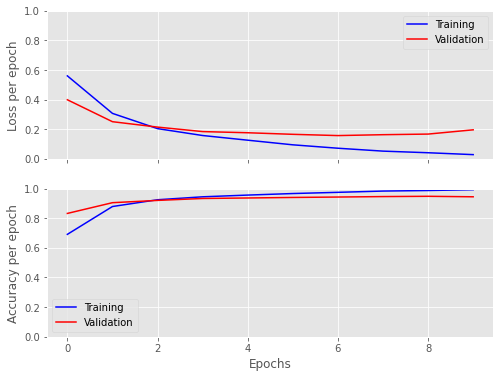

In [112]:
#one plot showing the training loss and validation loss
#another plot showing the training accuracy and validation accuracy

import numpy as np
import matplotlib.pyplot as plt

eps = np.arange(N_EPOCHS)

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6), sharex=True)

ax1.set_ylim([0, 1])
ax1.plot(epoch_loss_train,'b')
ax1.plot(epoch_loss_valid,'r')
ax1.set_ylabel("Loss per epoch")
ax1.legend(["Training","Validation"])

ax2.set_ylim([0, 1])
ax2.plot(epoch_accuracy_train,'b')
ax2.plot(epoch_accuracy_valid,'r')
ax2.set_ylabel("Accuracy per epoch")
ax2.set_xlabel("Epochs");
ax2.legend(["Training","Validation"])

plt.savefig("Epoch loss")
plt.show()

Compute the confusion matrix, accuracy, F1-score, precision and recall for each model. (10%)

In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # use seaborn plotting style

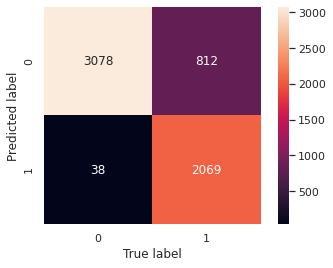

Accuracy:	0.858262
F1-score:	0.854133
Precision:	0.886612
Recall:		0.852979

Classification performance of [Multinomial] Naives Bayes Model:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      3116
           1       0.98      0.72      0.83      2881

    accuracy                           0.86      5997
   macro avg       0.89      0.85      0.85      5997
weighted avg       0.88      0.86      0.86      5997



In [114]:
# Plot the confusion matrix for model 1: Naive Bayes classifier
mat1_nb = confusion_matrix(test_label_final, predicted_categories1_nb)
sns.heatmap(mat1_nb.T, square = True, annot=True, fmt = "d")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.savefig("NB_Performance")
plt.show()

# Compute and print classification performance metrics
print("Accuracy:\t%f" % accuracy_score(test_label_final, predicted_categories1_nb))
print("F1-score:\t%f" % f1_score(test_label_final, predicted_categories1_nb, average='macro'))
print("Precision:\t%f" % precision_score(test_label_final, predicted_categories1_nb, average='macro'))
print("Recall:\t\t%f" % recall_score(test_label_final, predicted_categories1_nb, average='macro'))
print("\nClassification performance of [Multinomial] Naives Bayes Model:\n%s" % classification_report(test_label_final, predicted_categories1_nb))

Confusion matrix, accuracy, F1-score, precision, recall for the KNN Classifier (when KNN=3)

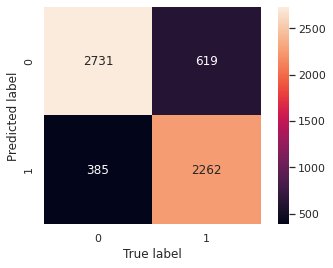

Accuracy:	0.832583
F1-score:	0.831553
Precision:	0.834888
Recall:		0.830794

Classification performance of KNN model (k=3):
              precision    recall  f1-score   support

           0       0.82      0.88      0.84      3116
           1       0.85      0.79      0.82      2881

    accuracy                           0.83      5997
   macro avg       0.83      0.83      0.83      5997
weighted avg       0.83      0.83      0.83      5997



In [115]:
# Plot the confusion matrix for model 2: KNN Classifier (KNN=3)
mat2_knn3 = confusion_matrix(test_label_final, predicted_categories2_knn3)
sns.heatmap(mat2_knn3.T, square = True, annot=True, fmt = "d")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.savefig("KNN3_Performance")
plt.show()

# Compute and print classification performance metrics
print("Accuracy:\t%f" % accuracy_score(test_label_final, predicted_categories2_knn3))
print("F1-score:\t%f" % f1_score(test_label_final, predicted_categories2_knn3, average='macro'))
print("Precision:\t%f" % precision_score(test_label_final, predicted_categories2_knn3, average='macro'))
print("Recall:\t\t%f" % recall_score(test_label_final, predicted_categories2_knn3, average='macro'))
print("\nClassification performance of KNN model (k=3):\n%s" % classification_report(test_label_final, predicted_categories2_knn3))

Confusion matrix, accuracy, F1-score, precision, recall for the KNN Classifier (when KNN=7)

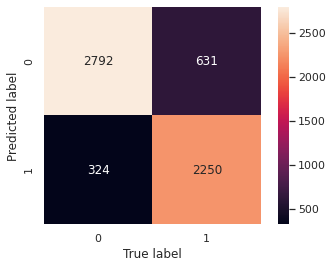

Accuracy:	0.840754
F1-score:	0.839442
Precision:	0.844892
Recall:		0.838500

Classification performance of KNN model (k=7):
              precision    recall  f1-score   support

           0       0.82      0.90      0.85      3116
           1       0.87      0.78      0.82      2881

    accuracy                           0.84      5997
   macro avg       0.84      0.84      0.84      5997
weighted avg       0.84      0.84      0.84      5997



In [116]:
# Plot the confusion matrix for model 2: KNN Classifier (KNN=3)
mat3_knn7 = confusion_matrix(test_label_final, predicted_categories3_knn7)
sns.heatmap(mat3_knn7.T, square = True, annot=True, fmt = "d")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.savefig("KNN7_Performance")
plt.show()

# Compute and print classification performance metrics
print("Accuracy:\t%f" % accuracy_score(test_label_final, predicted_categories3_knn7))
print("F1-score:\t%f" % f1_score(test_label_final, predicted_categories3_knn7, average='macro'))
print("Precision:\t%f" % precision_score(test_label_final, predicted_categories3_knn7, average='macro'))
print("Recall:\t\t%f" % recall_score(test_label_final, predicted_categories3_knn7, average='macro'))
print("\nClassification performance of KNN model (k=7):\n%s" % classification_report(test_label_final, predicted_categories3_knn7))

Confusion matrix, accuracy, F1-score, precision, recall for the LSTM Model

In [117]:
def predict(model4_lstm, sentence):
    tokenised = [token for token in word_tokenize(sentence)] # Tokenise text
    indexed = [TEXT.vocab.stoi[token] for token in tokenised] # Convert tokens to integers
    length = [len(indexed)] # Compute number of words
    tensor = torch.LongTensor(indexed).to(device) # Convert to PyTorch tensor
    tensor = tensor.unsqueeze(1).T # Reshape in form of batch,number of words
    length_tensor = torch.LongTensor(length) # Convert to PyTorch tensor
    prediction = model4_lstm(tensor, length_tensor) # Predict text
    return int(round(prediction.item()))

label_names = {0: 0, 1: 1}

news = "Biden elected President"

print(news,"->",label_names[predict(model4_lstm,news)], "(Note. 0 = reliable, 1 = unreliable)")

Biden elected President -> 1 (Note. 0 = reliable, 1 = unreliable)


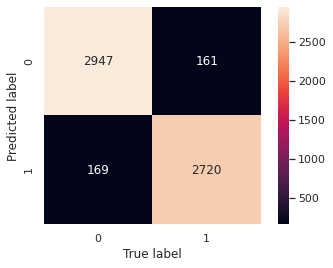

Accuracy:	0.944972
F1-score:	0.944894
Precision:	0.944850
Recall:		0.944940

Classification performance of LSTM:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3116
           1       0.94      0.94      0.94      2881

    accuracy                           0.94      5997
   macro avg       0.94      0.94      0.94      5997
weighted avg       0.94      0.94      0.94      5997



In [118]:
predicted_categories4_lstm = []

for i in test_text_final:
    predict_label = label_names[predict(model4_lstm, i)]
    predicted_categories4_lstm.append(predict_label)
    
# Plot the confusion matrix
mat4_lstm = confusion_matrix(test_label_final, predicted_categories4_lstm)
sns.heatmap(mat4_lstm.T, square = True, annot=True, fmt = "d")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.savefig("LSTM_Performance")
plt.show()

# Compute and print classification performance metrics
print("Accuracy:\t%f" % accuracy_score(test_label_final, predicted_categories4_lstm))
print("F1-score:\t%f" % f1_score(test_label_final, predicted_categories4_lstm, average='macro'))
print("Precision:\t%f" % precision_score(test_label_final, predicted_categories4_lstm, average='macro'))
print("Recall:\t\t%f" % recall_score(test_label_final, predicted_categories4_lstm, average='macro'))
print("\nClassification performance of LSTM:\n%s" % classification_report(test_label_final, predicted_categories4_lstm))

Store the five trained models in files and implement a function “predict_reliability(text, model)” that given a text string (“text”) and model filename (“model”), it will load the pre-trained model, and predict the article reliability of the input text. The function should be able to work without requiring to rerun all or part of your code. (10%)

In [125]:
import pickle 

#storing all four trained models in files
pkl_filename_nb = "model1_nb.pkl"
pkl_filename_knn3 = "model2_knn3.pkl"
pkl_filename_knn7 = "model3_knn7.pkl"
pkl_filename_lstm = "model4_lstm.pkl"

with open(pkl_filename_nb, "wb") as file:
    pickle.dump(model1_nb, file)

with open(pkl_filename_knn3, "wb") as file:
    pickle.dump(model2_knn3, file)
    
with open(pkl_filename_knn7, "wb") as file:
    pickle.dump(model3_knn7, file)
    
with open(pkl_filename_lstm, "wb") as file:
    pickle.dump(model4_lstm, file)

In [126]:
#load the pre-trained models
with open("model1_nb.pkl", "rb") as file:
    pickle_model = pickle.load(file)

with open("model2_knn3.pkl", "rb") as file:
    pickle_model = pickle.load(file)
    
with open("model3_knn7.pkl", "rb") as file:
    pickle_model = pickle.load(file)

with open("model4_lstm.pkl", "rb") as file:
    pickle_model = pickle.load(file)

In [134]:
#implement a function to predict using the NB, and KNN pre-trained models

from sklearn.feature_extraction.text import TfidfVectorizer

def predict_reliability(text, model):
    with open(model, "rb") as file:
        model = pickle.load(file)
    
    vectorise = TfidfVectorizer()
    text_v = vectorise.transform([text])
    
    predict = model.predict(text_v)
    return predict[0]

In [136]:
#implement a function to predict using the pre-trained LSTM

def predict(text, model4_lstm):
    tokenised = [token for token in word_tokenize(text)] # Tokenise text
    indexed = [TEXT.vocab.stoi[token] for token in tokenised] # Convert tokens to integers
    length = [len(indexed)] # Compute number of words
    tensor = torch.LongTensor(indexed).to(device) # Convert to PyTorch tensor
    tensor = tensor.unsqueeze(1).T # Reshape in form of batch,number of words
    length_tensor = torch.LongTensor(length) # Convert to PyTorch tensor
    prediction = model4_lstm(tensor, length_tensor) # Predict text
    return int(round(prediction.item()))

label_names = {0: 0, 1: 1}

with open("model4_lstm.pkl", "rb") as file:
    pickle_model = pickle.load(file)